<a href="https://colab.research.google.com/github/wanwanliang/ML_Projects/blob/main/notebook/Data_Visualization_and_Fill_NA_by_Supervised_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

In [2]:
drive.mount("/content/drive")
os.chdir('/content/drive/My Drive/ML/handson/datasets/housing')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
dt = pd.read_csv('housing.csv')
print('Data shape: {}'.format(dt.shape))
dt.head(5)

Data shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Check NA values

In [93]:
nats = dt.isnull().any(axis=0)

In [7]:
nats

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
dt.isnull().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dt.total_bedrooms[:10]

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
5     213.0
6     489.0
7     687.0
8     665.0
9     707.0
Name: total_bedrooms, dtype: float64

In [11]:
nats2 = dt.isnull().any(axis=1)

In [12]:
nats2.value_counts()

False    20433
True       207
dtype: int64

In [ ]:
dt2 = dt.loc[dt.isnull().sum(axis=1)==0]

In [15]:
print("Original data shape: {}".format(dt.shape))
print("Remove NA data shape: {}".format(dt2.shape))

Original data shape: (20640, 10)
Remove NA data shape: (20433, 10)


In [16]:
dt_dtype = []
[dt_dtype.append(type(dt.iloc[0,i])) for i in range(dt.shape[1])]

[None, None, None, None, None, None, None, None, None, None]

In [17]:
dt_dtype

[numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 str]

In [18]:
dt.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Data visualization

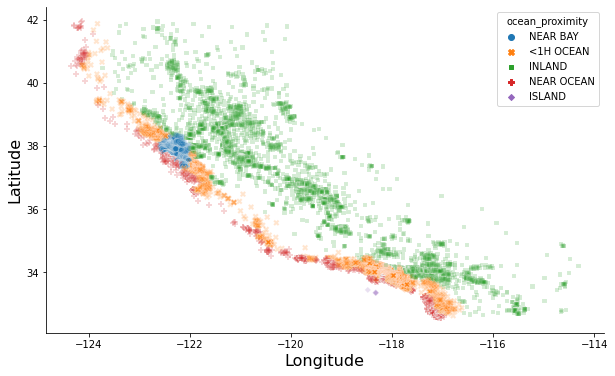

In [19]:
import seaborn as sns
plt.figure(figsize=(10,6))
#plt.plot(dt['longitude'], dt['latitude'], 'bo',alpha=0.2)
sns.scatterplot(data=dt, x='longitude', y='latitude', sizes='meidan_house_value'
,style='ocean_proximity',alpha=0.2, hue='ocean_proximity')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.xlabel("Longitude", fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.show()

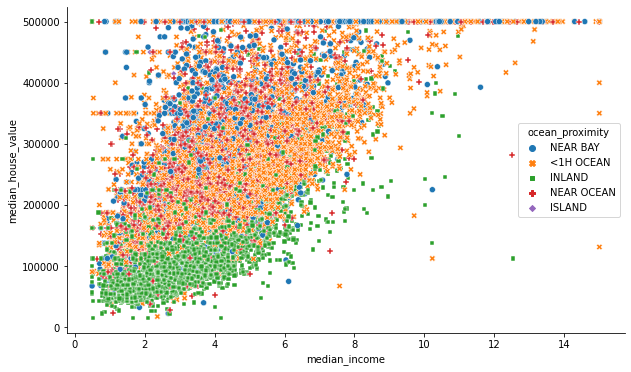

In [20]:
plt.figure(figsize=(10,6))
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
sns.scatterplot(x='median_income', y='median_house_value', data=dt, hue='ocean_proximity',style='ocean_proximity')
plt.show()

In [21]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Pairwise scatter plot

<Figure size 1440x1080 with 0 Axes>

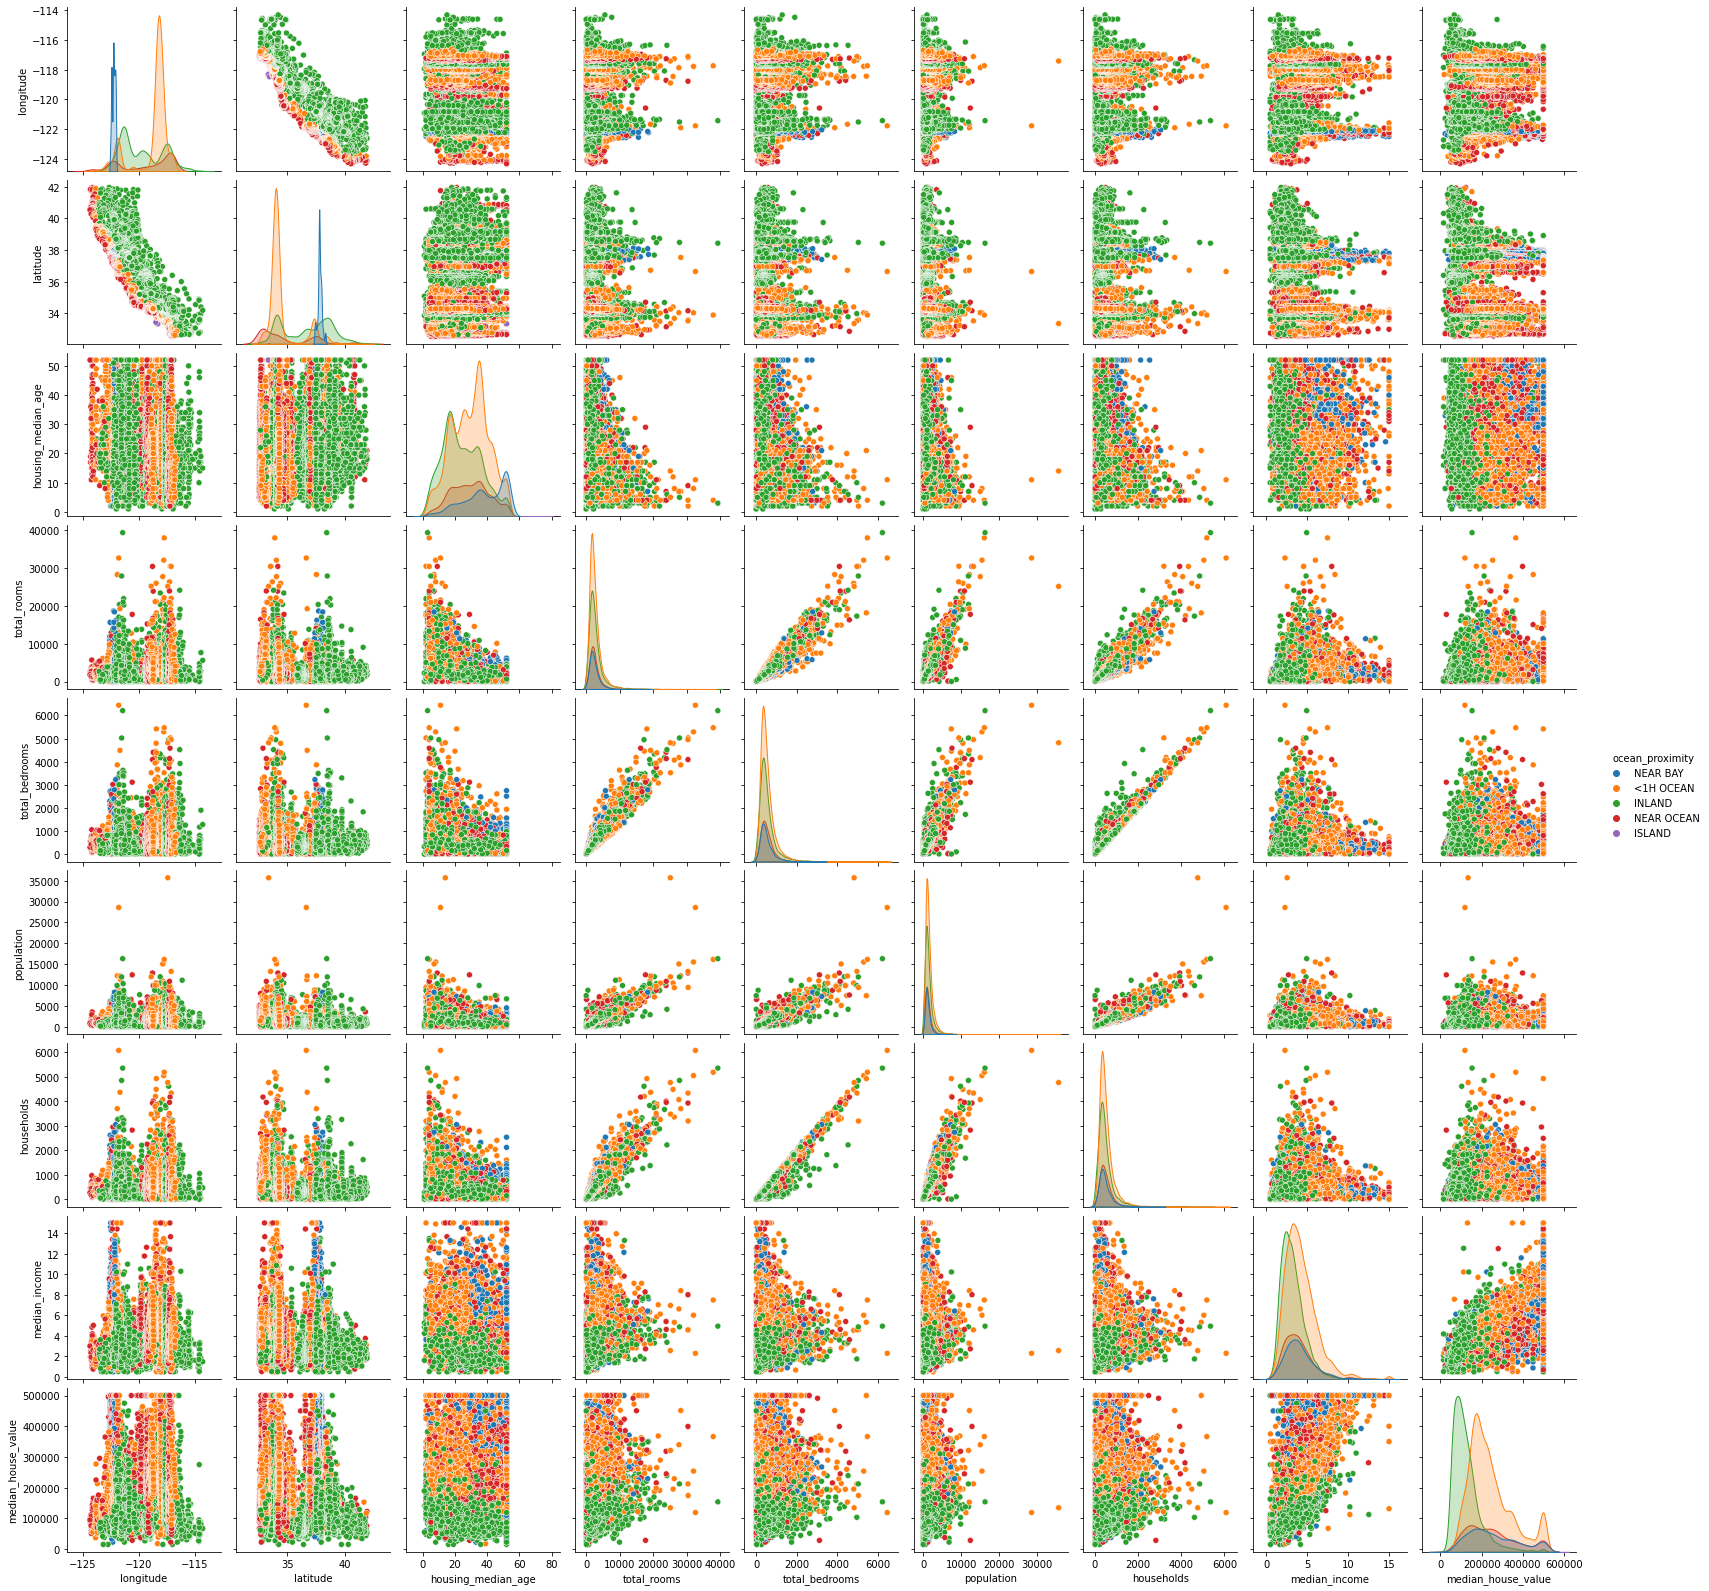

In [27]:
plt.figure(figsize=(20,15))
sns.pairplot(dt_nna, hue='ocean_proximity')
plt.show()

### Correlation plot

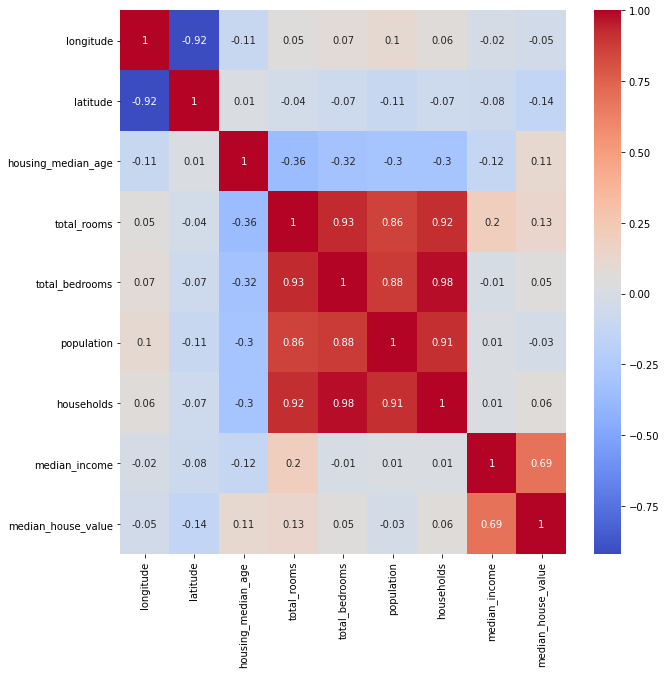

In [28]:
plt.figure(figsize=(10,10))
corr = dt_nna.drop('ocean_proximity',axis=1).corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Preprocessing pipeline

In [96]:
numeric_pip = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),                      
  ('scaler', StandardScaler())                        
])

cate_pip = Pipeline([
  ('encoder', OneHotEncoder())                      
])

from sklearn.compose import ColumnTransformer

full_pip = ColumnTransformer([
  ('numeric', numeric_pip, list(dt.drop('ocean_proximity', axis=1))),
  ('cat', cate_pip, ['ocean_proximity'])                              
])

## Fill NA by supervised method

In [48]:
dt_nna, dt_na = dt.loc[dt.isnull().any(axis=1)==False], dt.loc[dt.isnull().any(axis=1)==True]
print(dt_nna.shape), print(dt_na.shape)

x_nna = dt_nna[['total_rooms', 'households', 'population']]
x_nna2 = StandardScaler().fit_transform(x_nna)
x_nna2.shape

(20433, 3)

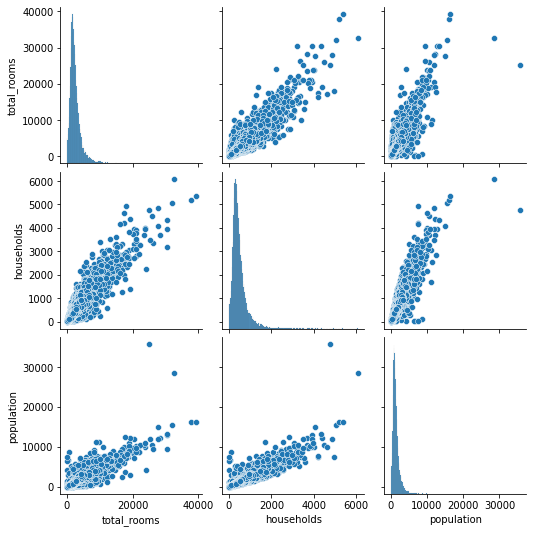

In [49]:
sns.pairplot(x_nna)

In [57]:
scaler = StandardScaler()
scaler.fit(x_nna)
x_nna2 = scaler.transform(x_nna)

In [58]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x_nna2, y_nna, test_size=0.2)
print(x_tr.shape), print(x_ts.shape),print(y_tr.shape),print(y_ts.shape)

(16346, 3)
(4087, 3)
(16346,)
(4087,)


(None, None, None, None)

### Use linear model

In [97]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
lr.fit(x_tr, y_tr)
lr.score(x_ts, y_ts)

0.9717900112245829

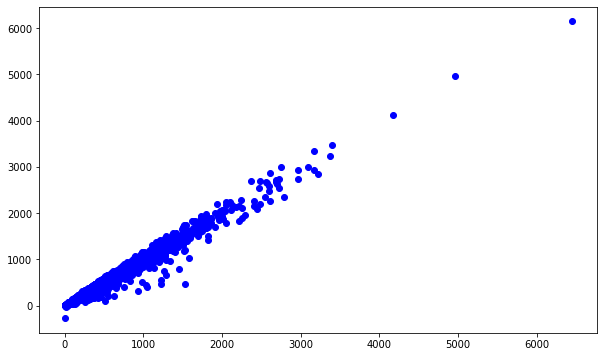

In [61]:
y_pred2 = lr.predict(x_ts)
plt.figure(figsize=(10,6))
plt.plot(y_ts, y_pred2, 'bo')
plt.show()

### Interpretate NA with the trained linear model

In [76]:
x_na = dt_na[['total_rooms', 'households', 'population']]
x_na2 = scaler.transform(x_na)

y_na = lr.predict(x_na2)

In [83]:
y_na = pd.DataFrame(y_na)
y_na.columns=['total_bedrooms']
y_na.columns

Index(['total_bedrooms'], dtype='object')

In [84]:
dt_na['total_bedrooms']=y_na['total_bedrooms'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
dt_na['total_bedrooms']

290       242.274131
341       263.752535
538      1296.072043
563       164.939049
696       172.760786
            ...     
20267     781.679463
20268     757.540902
20372     759.124066
20460     913.137790
20484     541.367776
Name: total_bedrooms, Length: 207, dtype: float64

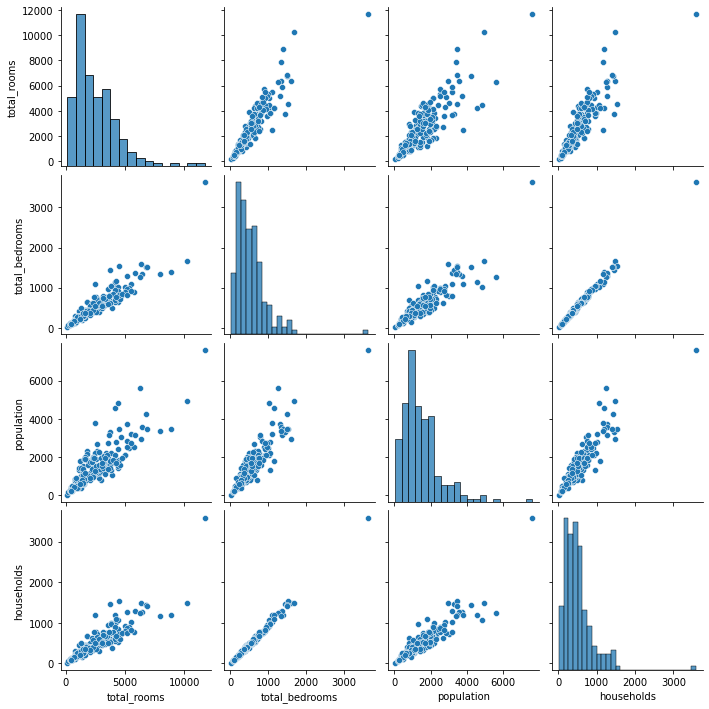

In [92]:
sns.pairplot(dt_na.iloc[:,[3,4,5,6]])
plt.show()

### Replace the orignal dataset with filled NA dataset

In [98]:
dt_all = pd.concat([dt_nna, dt_na], axis=0)
dt_all.shape

(20640, 10)